### What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
from math import *
from scipy import stats

In [16]:
df = pd.read_csv('data/human_body_temperature.csv')

# 1. Is the distribution of body temperatures normal?  

Yes. The distribution is approximately bell-shaped, as shown below. 

(array([  4.,   6.,  15.,  29.,  27.,  30.,  15.,   1.,   2.,   1.]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

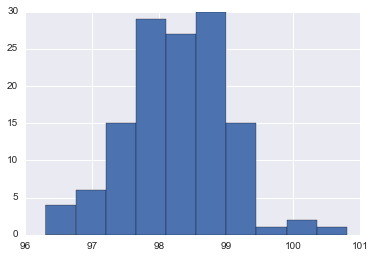

In [12]:
plt.hist(df.temperature)

# 2. Is the true population mean really 98.6 degrees F?

In [13]:
len(df) #this is the sample size

130

Since the sample is 130, which is greater than 30, then by the central limit theorem, and the fact that the temperatures appear approximately normally distributed, the sample mean statistic is approximately normally distributed.  Since we do not know the population standard deviation, we'll calculate a t test statistic and run a 
hypothesis test.  A t distribution has fatter tails than a z distribution, so there is a greater likelihood that the observed test statistic will be a distance that is far away from the assumed population mean than under the z test, and thus a decreased likelihood of rejecting the null hypothesis.  

Let's run a two-tailed t test with alpha = .001. 
Null: mean = 98.6
Alternative: mean != 98.6

In [47]:
m=df.temperature.mean()
sd=df.temperature.std()
standard_error=sd/sqrt(len(df))
t=(m-98.6)/standard_error
p_value=stats.t.cdf(t,len(df)-1,loc=0,scale=1)*2
print ' mean: %r \n standard deviation: %r \n standard error: %r \n t value: %r \n \
p value: %r' %(m,sd, standard_error,t,p_value)

 mean: 98.249230769230749 
 standard deviation: 0.73318315803894563 
 standard error: 0.064304416837891024 
 t value: -5.4548232923645195 
 p value: 2.4106320415561276e-07


The p-value is very low (<.001) and the null is rejected at the .1% level.  Our statistical test results serve as evidence that the true population mean temperature is not 98.6 degrees F.  

The above manually calculated t test results are verified below via the 1 sample t test contained in the stat module of the scipy library:

In [80]:
ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

# 3. At what temperature should we consider someone's temperature to be "abnormal"?

Let's compute a 95% confidence interval, which we calculate based on the assumption that the sample mean has an approximately normal distribution, which as we already covered, appears to be a reasonable assumption.  By standardizing the sample mean using the sample standard error, we create the t test statistic which we'll use to create the 95% confidence interval.  Since the degrees of freedom is so large (df=129), the test statistic's distribution is very close to a z distribution and the t critical values are +/- 1.96.    

In [35]:
margin_of_error=1.96*standard_error
conf_int_lower=m-margin_of_error
conf_int_upper=m+margin_of_error
print ' margin of error: %.3f \n 95%% confidence interval (%.2f, %.2f)' \
%(margin_of_error,conf_int_lower,conf_int_upper)

 margin of error: 0.126 
 95% confidence interval (98.12, 98.38)


A temperature outside the interval (98.12, 98.38) would be considered abnormal since we have 95% confidence that the sample mean temperature is within this interval (as well as 95% confidence that the population mean temperature is within this interval).  

# 4. Is there a significant difference between males and females in normal temperature?

Let's assume the population variances of male and female temperatures are not the same.  We will conduct a two-tailed hypothesis test with alpha = .001 
null: male temperature = female temperature, alternative: male temp != female temp

In [48]:
#Get the sample means and standard deviations for males and females
m_gender=df.groupby('gender').mean()
m_male=m_gender.temperature['M']
m_female=m_gender.temperature['F']
sd_gender=df.groupby('gender').std()
sd_male=sd_gender.temperature['M']
sd_female=sd_gender.temperature['F']
n_male=len(df[df.gender=='M'])
n_female=len(df[df.gender=='F'])

In [76]:
t_two_sample=((m_male-m_female)-0)/sqrt((sd_male**2/n_male)+(sd_female**2/n_female))
df_two_sample=(((sd_male**2/n_male)+(sd_female**2/n_female))**2)/((((sd_male**2/n_male)**2)\
/(n_male-1))+(((sd_female**2/n_female)**2)/(n_female-1)))

In [78]:
p_value_two_sample=stats.t.cdf(t_two_sample,df_two_sample)*2
print ' t value: %.2f \n p value: %.3f' %(t_two_sample, p_value_two_sample)
print 'The p value above is greater than 1% so the null that the male and \
female population mean temperatures are the same cannot be rejected.  There is not a \
significant difference that male and female temperatures are different. '

 t value: -2.29 
 p value: 0.024
The p value above is greater than 1% so the null that the male and female population mean temperatures are the same cannot be rejected.  There is not a significant difference that male and female temperatures are different. 


Let's verify the above calculations by using two sample t test contained in the stats module of scipy!

In [73]:
stats.ttest_ind(df[df.gender=='M'].temperature,df[df.gender=='F'].temperature,equal_var=False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

The above results are the same, so it appears that my manual calculation of the two sample
t test was correct.  